In [3]:
import os
import glob
import wave
import pydub
import librosa
import itertools
import numpy as np
import contextlib
from keras.utils import np_utils

Using TensorFlow backend.


In [68]:
paths = ['psd', 'std', 'wbd', 'wsd']
# paths = ['wbd']

In [69]:
def windows(data, window_size):
    start = 0
    while start < len(data):
        yield start, start + window_size
        start += (window_size / 2)
        start = int(start)

def extract_features(parent_dir, sub_dirs, file_ext="*.wav", bands = 60, frames = 41, label = 1):
    window_size = 512 * (frames - 1)
    log_specgrams = []
    labels = []
    for l, sub_dir in enumerate(sub_dirs):
        for fn in glob.glob(os.path.join(parent_dir, sub_dir, file_ext)):
            
            # Load Sound Clips and changes Sampling Rate
            
            sound_clip, s= librosa.load(fn)
            
            for (start,end) in windows(sound_clip, window_size):
#                 print (start, end)
                if(len(sound_clip[start:end]) == window_size):
                    signal = sound_clip[start:end]
                    melspec = librosa.feature.melspectrogram(signal, n_mels = bands)
                    logspec = librosa.logamplitude(melspec)
#                     logspec = logspec.T.flatten()[:, np.newaxis].T
#                     print(logspec.shape)
#                     print(melspec.shape)
                    log_specgrams.append(logspec)
                    labels.append(l)
            
    log_specgrams = np.asarray(log_specgrams).reshape(len(log_specgrams),bands,frames,1)
    features = np.concatenate((log_specgrams, np.zeros(np.shape(log_specgrams))), axis = 3)
    for i in range(len(features)):
        features[i, :, :, 1] = librosa.feature.delta(features[i, :, :, 0])
    
    return np.array(features), np.array(labels)

parent_dir = './test'

if True:
    features,labels = extract_features(parent_dir, paths, frames=41)
    labels = np_utils.to_categorical(labels, 4)
#     np.save('train_features.npy', features)
#     np.save('train_labels.npy', labels)



In [70]:
np.random.seed(1)

perm = np.random.permutation(labels.shape[0])

In [71]:
perm_val = perm[0:int(len(perm)/2)]
perm_test = perm[int(len(perm)/2):]

In [72]:
val_features = features[perm_val]
val_labels = labels[perm_val]

test_features = features[perm_test]
test_labels = labels[perm_test]

In [73]:
np.save('val_features.npy', features)
np.save('val_labels.npy', labels)
np.save('test_features.npy', features)
np.save('test_labels.npy', labels)

In [1]:
import matplotlib.pyplot as plt

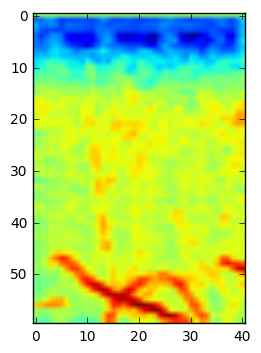

In [65]:


plt.show(plt.imshow(features[56,:,:,0]))

In [66]:
features.shape

(8354, 60, 41, 2)

In [67]:
np.save('train_features.npy', features)
np.save('train_labels.npy', labels)